In [1]:
import pandas as pd
from pandas import concat
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
from pandas import DataFrame

C:\Users\Laptop\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#zaciągnięcie danych, podział na "train" i "test"
dane = pd.read_csv('C:/Users/Laptop/Desktop/Grypa/Dane/total.csv', index_col=['data'])
dane = dane['Total']
dane_test_train = dane[(dane.index > '2012-08-23' ) & (dane.index < '2020-03-16')]

train_87 = dane_test_train[0:314]
series_train_87 = train_87.values
test_13 = dane_test_train[314:]
series_test_13 = test_13.values

series_dane_test_train = dane_test_train.values

In [3]:
series_dane_test_train

array([ 10530,  14375,  23150,  27864,  34232,  45357,  43668,  56433,
        46712,  50854,  47865,  58867,  58130,  61968,  62147,  78779,
       134358, 213906, 209903, 219511, 150439, 135150, 109313,  77151,
        87372, 100518, 101205,  91358,  75947,  81863,  60122,  44866,
        30305,  33372,  28421,  33776,  31103,  28628,  28363,  26616,
        22480,  24834,  18950,  18614,  12487,  10904,  11055,  15220,
        16193,  29241,  39036,  60162,  62488,  60656,  59200,  63941,
        52107,  56003,  56685,  57562,  61116,  63501,  64135,  60608,
        43479,  62851,  68099,  94506,  82817,  86595,  93722,  96752,
       111154, 116170, 114440, 114874,  88122,  80139,  55673,  49849,
        47169,  48287,  43147,  49070,  43614,  40674,  34892,  42247,
        35353,  32122,  25750,  24170,  18664,  17615,  17962,  18911,
        22063,  48622,  57551,  70439,  72470,  82198,  79154,  97754,
        73896,  79554,  81710,  86446,  87006, 108325,  86331,  82144,
      

In [ ]:
history = [x for x in series_train_87]
predictions=list()
for t in range(len(series_test_13)):
    model= ARIMA(history, order=(48,0,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs=series_test_13[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(series_test_13, predictions)
print('Test MSE: %.3f' % error)

In [4]:
forecast = model_fit.forecast(steps=6)[0]

In [5]:
forecast

array([207943.34167709, 188116.0086552 , 180544.06356929, 159199.73338848,
       152182.07887437, 132279.161179  ])

In [22]:
predictions

[array([154182.03057097]),
 array([124574.13001351]),
 array([106622.18888384]),
 array([95493.996329]),
 array([109039.12995621]),
 array([64567.71064398]),
 array([70202.6073245]),
 array([50635.5419622]),
 array([51617.10275569]),
 array([68233.61224037]),
 array([79801.91963773]),
 array([65936.49045592]),
 array([43690.23027866]),
 array([42379.1361774]),
 array([41677.16774546]),
 array([41804.45403669]),
 array([40339.6691846]),
 array([35061.82931509]),
 array([39049.90941988]),
 array([32794.08778773]),
 array([25858.91603893]),
 array([30579.75230669]),
 array([34531.17485871]),
 array([35302.98920831]),
 array([61731.18017676]),
 array([100806.28669901]),
 array([125643.09424622]),
 array([113525.11650636]),
 array([113126.01982623]),
 array([112062.83349633]),
 array([126979.82461072]),
 array([91469.75455357]),
 array([99285.45844203]),
 array([112805.1318793]),
 array([106802.88872375]),
 array([116229.79244166]),
 array([122378.60897066]),
 array([129950.65570451]),
 arr

In [20]:
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  361
Model:                     ARMA(5, 0)   Log Likelihood               -4071.575
Method:                       css-mle   S.D. of innovations          19075.379
Date:                Sun, 30 Aug 2020   AIC                           8157.151
Time:                        23:25:28   BIC                           8184.373
Sample:                             0   HQIC                          8167.974
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.793e+04   1.14e+04      7.722      0.000    6.56e+04     1.1e+05
ar.L1.y        1.0913      0.052     20.826      0.000       0.989       1.194
ar.L2.y        0.1078      0.077      1.394      0.1

In [25]:
model.plot_diagnostics(figsize=(7,5))
plt.show()

AttributeError: 'ARMA' object has no attribute 'plot_diagnostics'

NameError: name 'plt' is not defined

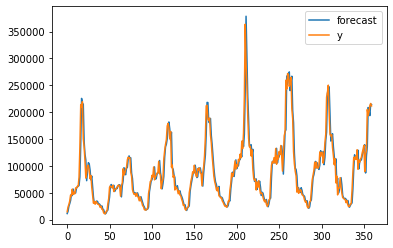

In [42]:
model_fit.plot_predict(dynamic=False)
plt.show()

                   0
count     361.000000
mean       89.622906
std     19489.017034
min    -88722.281118
25%     -8078.057863
50%     -2286.829153
75%      8209.652679
max    124048.535376


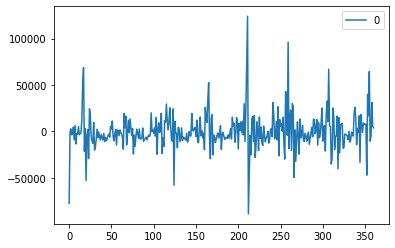

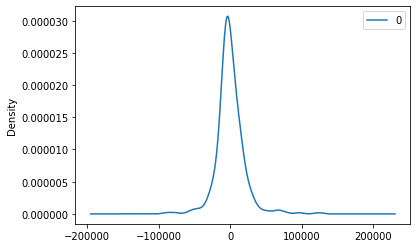

In [21]:
residuals = DataFrame(model_fit.resid)
residuals.plot()
residuals.plot(kind='kde')
print(residuals.describe())

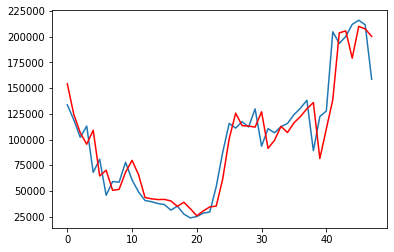

In [19]:
pyplot.plot(series_test_13)
pyplot.plot(predictions, color='red')

In [9]:
model2 = ARIMA(series_dane_test_train, order=(5,0,2))
model_fit2 = model2.fit(disp=0)

In [10]:
forecast2 = model_fit2.forecast(steps=6)[0]

In [11]:
forecast2

array([129095.47385079, 116793.47226887,  96674.00625315,  92866.36468451,
        77583.20366889,  77502.78522839])